# Exploratory Data Analysis notebook

This is part of the Yotta Academy project 1.

Authors: Jérémie KOSTER and Olivier COLLIER

In [1]:
# ------ Imports -------
import os
from datetime import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas_profiling import ProfileReport

In [3]:
PATH_TO_DATA_FOLDER = '../data/raw'

In [4]:
CLIENT_DATA_FILE = 'data.csv'
SOCIO_ECO_FILE = 'socio_eco.csv'

In [5]:
CLIENT_PATH_DATA_FILE = os.path.join(PATH_TO_DATA_FOLDER,CLIENT_DATA_FILE)
PATH_SOCIO_ECO_FILE = os.path.join(PATH_TO_DATA_FOLDER,SOCIO_ECO_FILE)

## 1. Load data

In [6]:
client_data = pd.read_csv(CLIENT_PATH_DATA_FILE, sep=';')
socio_eco = pd.read_csv(PATH_SOCIO_ECO_FILE, sep=';')

In [7]:
sub_target = client_data['SUBSCRIPTION']
client_data.drop(columns='SUBSCRIPTION',inplace=True)

## 2. Description of datasets

### a. Data file

In [8]:
client_data.head(7)

DATE  AGE       JOB_TYPE       STATUS   EDUCATION HAS_DEFAULT  \
0  2008-05-05   58        Manager        Marié   Tertiaire          No   
1  2008-05-05  123     Technicien          NaN  Secondaire          No   
2  2008-05-05   33  Entrepreuneur        Marié  Secondaire          No   
3  2008-05-05   47       Col bleu        Marié         NaN          No   
4  2008-05-05   33            NaN  Célibataire         NaN          No   
5  2008-05-05   35        Manager        Marié   Tertiaire          No   
6  2008-05-05   28        Manager  Célibataire   Tertiaire          No   

   BALANCE HAS_HOUSING_LOAN HAS_PERSO_LOAN CONTACT  DURATION_CONTACT  \
0     2143              Yes             No     NaN               261   
1       29              Yes            NaN     NaN               151   
2        2              Yes            Yes     NaN                76   
3     1506              Yes             No     NaN                92   
4        1               No             No     NaN               198   
5      231              Yes             No     NaN               139   
6      447              Yes            Yes     NaN               217   

   NB_CONTACT  NB_DAY_LAST_CONTACT  NB_CONTACT_LAST_CAMPAIGN  \
0           1                   -1                         0   
1           1                   -1                         0   
2           1                   -1                         0   
3           1                   -1                         0   
4           1                   -1                         0   
5           1                   -1                         0   
6           1                   -1                         0   

  RESULT_LAST_CAMPAIGN  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
5                  NaN  
6                  NaN

In [9]:
client_data.describe()

AGE        BALANCE  DURATION_CONTACT   NB_CONTACT  \
count  45136.000000   45136.000000      45136.000000  45136.00000   
mean      44.206354    1362.182847        258.050625      2.76573   
std       19.149653    3046.691765        257.527875      3.10002   
min       18.000000   -8019.000000          0.000000      1.00000   
25%       33.000000      72.000000        103.000000      1.00000   
50%       40.000000     447.500000        180.000000      2.00000   
75%       50.000000    1425.000000        318.000000      3.00000   
max      123.000000  102127.000000       4918.000000     63.00000   

       NB_DAY_LAST_CONTACT  NB_CONTACT_LAST_CAMPAIGN  
count         45136.000000              45136.000000  
mean             40.042272                  0.575173  
std              99.910200                  2.296948  
min              -1.000000                  0.000000  
25%              -1.000000                  0.000000  
50%              -1.000000                  0.000000  
75%              -1.000000                  0.000000  
max             854.000000                275.000000

In [24]:
profile_data = ProfileReport(client_data)
profile_data.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## b. Cast types

In [25]:
client_data['DATE'] = client_data['DATE'].apply(lambda d: datetime.strptime(d,'%Y-%m-%d'))

## Valeurs manquantes par colonne

In [26]:
nb_na = client_data.isna().sum()
percent_na = round(client_data.isna().sum()/len(client_data)*100,1)

In [27]:
na_data = pd.DataFrame({'Nb_na_values': nb_na, 'Percent_na': percent_na})

na_data.sort_values(by='Nb_na_values', ascending=False)

Nb_na_values  Percent_na
RESULT_LAST_CAMPAIGN             36939        81.8
CONTACT                          13019        28.8
EDUCATION                         1853         4.1
HAS_PERSO_LOAN                    1354         3.0
STATUS                            1128         2.5
JOB_TYPE                           286         0.6
DATE                                 0         0.0
AGE                                  0         0.0
HAS_DEFAULT                          0         0.0
BALANCE                              0         0.0
HAS_HOUSING_LOAN                     0         0.0
DURATION_CONTACT                     0         0.0
NB_CONTACT                           0         0.0
NB_DAY_LAST_CONTACT                  0         0.0
NB_CONTACT_LAST_CAMPAIGN             0         0.0

# Variables catégorielles

In [55]:
cat_features = client_data.select_dtypes('object')
cat_features.columns

Index(['JOB_TYPE', 'STATUS', 'EDUCATION', 'HAS_DEFAULT', 'HAS_HOUSING_LOAN',
       'HAS_PERSO_LOAN', 'CONTACT', 'RESULT_LAST_CAMPAIGN'],
      dtype='object')

In [58]:
cat_report = ProfileReport(cat_features)
cat_report.to_notebook_iframe()

/Users/jeremie/Library/Caches/pypoetry/virtualenvs/productsubscription-oc-jk-rf8_RRH8-py3.8/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
def plot_histo_categorical(cat_features: pd.DataFrame):
    nb_features = len(cat_features.columns)
    
    nb_rows = int(np.ceil(nb_features/3))
    nb_cols = 3
    cnt = 1 # initialize subplot counter
    
    fig, axes = plt.subplots(nb_rows, nb_cols)
    fig.set_figheight(20)
    fig.set_figwidth(20)

    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    #fig.set_figheight(65)
    #fig.set_figwidth(16)
    
    for feature in cat_features.columns:
        feature_data = cat_features[feature].value_counts()
        frequency_feature = feature_data/cat_features[feature].notnull().sum()
        plt.subplot(nb_rows, nb_cols, cnt)
        frequency_feature.plot(kind='bar')
        plt.title(feature)
        plt.xticks(rotation=70)
        plt.yticks(['{:.0%}'.format(x) for x in axes[nb_rows][nb_cols].get_yticks()])
        
        cnt += 1
    plt.show()
            

IndexError: index 3 is out of bounds for axis 0 with size 3

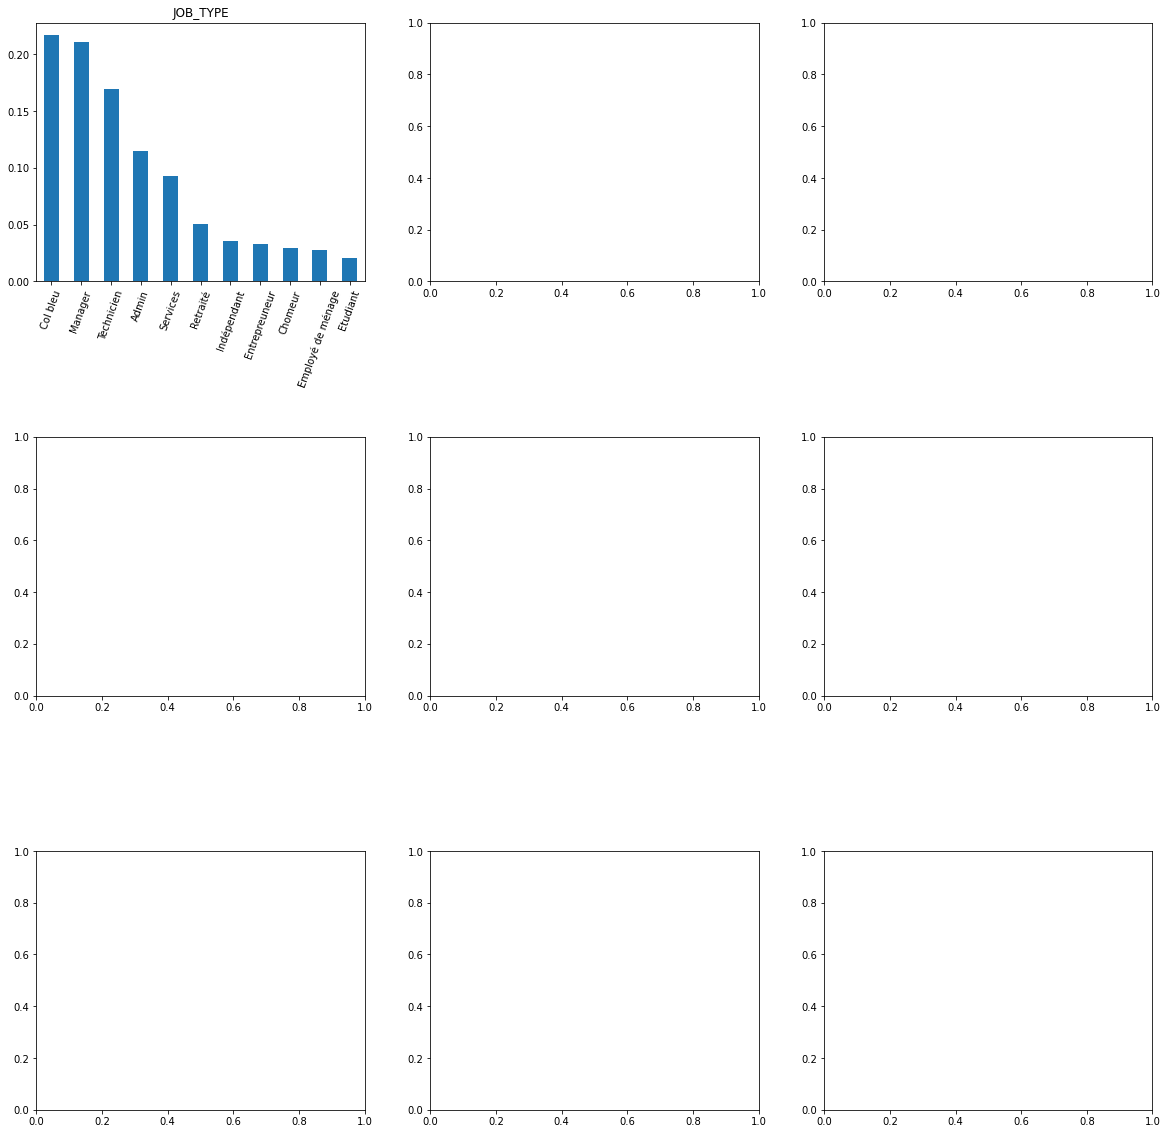

In [128]:
plot_histo_categorical(cat_features)

Socio eco data

In [129]:
profile_socio = ProfileReport(socio_eco)
profile_socio.to_notebook_iframe()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]